In [ ]:
import pandas as pd
import numpy as np

# Data Preparation

## File names list
Firstly we created a list to store the file names to ignore importing data manually form every single data file

In [ ]:
files = [
    'amsterdam_weekdays.csv', 'amsterdam_weekends.csv',
    'athens_weekdays.csv', 'athens_weekends.csv',
    'barcelona_weekdays.csv', 'barcelona_weekends.csv',
    'berlin_weekdays.csv', 'berlin_weekends.csv',
    'budapest_weekdays.csv', 'budapest_weekends.csv',
    'lisbon_weekdays.csv', 'lisbon_weekends.csv',
    'london_weekdays.csv', 'london_weekends.csv',
    'paris_weekdays.csv', 'paris_weekends.csv',
    'rome_weekdays.csv', 'rome_weekends.csv',
    'vienna_weekdays.csv', 'vienna_weekends.csv'
]

## Fetching more accurate data about locations

Reverse geocoder helps us get a location using the coordinates (Latitude, Longtude)

In [ ]:
!pip install reverse_geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268067 sha256=be45e0ab292702e0a94330938e759dc289b2e9532e329a30071d0b2b8aa2cd30
  Stored in directory: /root/.cache/pip/wheels/11/e1/67/6e47f0ad41ea1843d37e1fbe79c6074744a1f4aace641cf800
Successfully built reverse_geocoder


Pycountry provides a registry or a lookup table for the countries and a class named Country that stores some meta data about the country, we will justify this choice very soon.

In [ ]:
! pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.1 MB/s eta 0:00:00


Now to concatenate the 20 files we need to prepare the new columns:
- 'day_type': the type is specified in the file name (weekend or weekday)
- 'city': To get more accurate location we use reverse geocoder to get the city name rather than getting the city from the file name -- the search function takes a list of pairs or lats and longs and returns a list of dicts (a dict for every lat-long pair)
- 'country': we are mainly concerned about the country so that we can add more features futherly based on country. Here the use of pycountry appears. The list of dict returned by the sesarch provides the country name as 2 alpha letters ratrher than the whole name. Using the lookup table in Pycountry we get a specific country info in an object of type Country and we get its name attribute to add it to the column 'country'.

In [ ]:
import reverse_geocoder as rg
import pycountry

dfs = []

for file in files:
    df = pd.read_csv(file)

    # ---- Day type from filename ----
    df['day_type'] = 'weekday' if 'weekday' in file else 'weekend'

    # ---- Reverse geocode (city + country code) ----
    coords = list(zip(df['lat'], df['lng']))
    results = rg.search(coords)

    df['city'] = [r['name'] for r in results]
    df['country'] = [
        pycountry.countries.get(alpha_2=r['cc']).name
        for r in results
    ]

    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

Loading formatted geocoded file...


In [ ]:
final_df[final_df['country'] == 'Netherlands']

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
2075         972   473.132894  Entire home/apt        False         False   
2076         973   491.645771  Entire home/apt        False         False   
2077         974  1812.855904  Entire home/apt        False         False   
2078         975   399.315727  Entire home/apt        False         False   
2079         976   728.798069  Entire home/apt        False         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                 2.0              False      1    0                10.0  ...   
1                 4.0              False      0    0                 8.0  ...   
2                 2.0              False      0    1                 9.0  ...   
3                 4.0              False      0    1                 9.0  ...   
4                 2.0               True      0    0                10.0  ...   
...               ...                ...    ...  ...                 ...  ...   
2075              2.0              False      0    0                 9.0  ...   
2076              3.0              False      0    0                10.0  ...   
2077              4.0              False      0    0                 8.0  ...   
2078              2.0              False      0    0                 9.0  ...   
2079              4.0               True      0    0                10.0  ...   

      metro_dist  attr_index  attr_index_norm  rest_index  rest_index_norm  \
0       2.539380   78.690379         4.166708   98.253896         6.846473   
1       0.239404  631.176378        33.421209  837.280757        58.342928   
2       3.651621   75.275877         3.985908   95.386955         6.646700   
3       0.439876  493.272534        26.119108  875.033098        60.973565   
4       0.318693  552.830324        29.272733  815.305740        56.811677   
...          ...         ...              ...         ...              ...   
2075    1.723938  283.762206        15.023909  351.969002        30.683248   
2076    1.465641  241.418512        12.782005  312.785000        27.267344   
2077    0.388542  257.946814        13.657103  336.589450        29.342520   
2078    0.882094  156.045916         8.261917  189.962216        16.560145   
2079    0.454608  426.540426        22.583362  559.122644        48.742073   

          lng       lat  day_type       city      country  
0     4.90569  52.41772   weekday  Landsmeer  Netherlands  
1     4.90005  52.37432   weekday  Amsterdam  Netherlands  
2     4.97512  52.36103   weekday     Diemen  Netherlands  
3     4.89417  52.37663   weekday  Amsterdam  Netherlands  
4     4.90051  52.37508   weekday  Amsterdam  Netherlands  
...       ...       ...       ...        ...          ...  
2075  4.86742  52.36629   weekend  Amsterdam  Netherlands  
2076  4.88066  52.38412   weekend  Amsterdam  Netherlands  
2077  4.90688  52.35794   weekend  Amsterdam  Netherlands  
2078  4.86056  52.34639   weekend  Amsterdam  Netherlands  
2079  4.89676  52.36301   weekend  Amsterdam  Netherlands  

[2080 rows x 23 columns]

As you see, we have more than one city for Netherlands (not only Amsterdam) so we got more accurate data successfully

Now lets have a backup of this data in case of any corruption happened

In [ ]:
final_df.to_csv('Final.csv')

In [ ]:
final_df.describe().T

count         mean          std        min  \
Unnamed: 0                  51707.0  1620.502388  1217.380366   0.000000   
realSum                     51707.0   279.879591   327.948386  34.779339   
person_capacity             51707.0     3.161661     1.298545   2.000000   
multi                       51707.0     0.291353     0.454390   0.000000   
biz                         51707.0     0.350204     0.477038   0.000000   
cleanliness_rating          51707.0     9.390624     0.954868   2.000000   
guest_satisfaction_overall  51707.0    92.628232     8.945531  20.000000   
bedrooms                    51707.0     1.158760     0.627410   0.000000   
dist                        51707.0     3.191285     2.393803   0.015045   
metro_dist                  51707.0     0.681540     0.858023   0.002301   
attr_index                  51707.0   294.204105   224.754123  15.152201   
attr_index_norm             51707.0    13.423792     9.807985   0.926301   
rest_index                  51707.0   626.856696   497.920226  19.576924   
rest_index_norm             51707.0    22.786177    17.804096   0.592757   
lng                         51707.0     7.426068     9.799725  -9.226340   
lat                         51707.0    45.671128     5.249263  37.953000   

                                   25%          50%          75%           max  
Unnamed: 0                  646.000000  1334.000000  2382.000000   5378.000000  
realSum                     148.752174   211.343089   319.694287  18545.450285  
person_capacity               2.000000     3.000000     4.000000      6.000000  
multi                         0.000000     0.000000     1.000000      1.000000  
biz                           0.000000     0.000000     1.000000      1.000000  
cleanliness_rating            9.000000    10.000000    10.000000     10.000000  
guest_satisfaction_overall   90.000000    95.000000    99.000000    100.000000  
bedrooms                      1.000000     1.000000     1.000000     10.000000  
dist                          1.453142     2.613538     4.263077     25.284557  
metro_dist                    0.248480     0.413269     0.737840     14.273577  
attr_index                  136.797385   234.331748   385.756381   4513.563486  
attr_index_norm               6.380926    11.468305    17.415082    100.000000  
rest_index                  250.854114   522.052783   832.628988   6696.156772  
rest_index_norm               8.751480    17.542238    32.964603    100.000000  
lng                          -0.072500     4.873000    13.518825     23.786020  
lat                          41.399510    47.506690    51.471885     52.641410

# Adding new features

## Features Extraction

We wil use kagglehub library to be able to fetch datasets needed and os to access the path where the data were downloaded

### Cost of living dataset
The first needed dataset is cost of living by country as we think the data of the costs may affect the attraction for a specific country so the also affects the lisitng nearby reagion

In [ ]:
import kagglehub
import os
path = kagglehub.dataset_download(
    "myrios/cost-of-living-index-by-country-by-number-2024"
)

print("Dataset folder:", path)
os.listdir(path)



100%|██████████| 2.83k/2.83k [00:00<00:00, 1.35MB/s]

Extracting files...
Dataset folder: /root/.cache/kagglehub/datasets/myrios/cost-of-living-index-by-country-by-number-2024/versions/1


['Cost_of_Living_Index_by_Country_2024.csv']

To prevent hardcoding the datasets' names we will loop through the path to get the specific csv file then use join function to join the file name with the path to ensure we have the absolute path to ensure reaching the data correctly.

In [ ]:
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
cost_df = pd.read_csv(os.path.join(path, csv_file))
cost_df.head()


Rank      Country  Cost of Living Index  Rent Index  \
0     1  Switzerland                 101.1        46.5   
1     2      Bahamas                  85.0        36.7   
2     3      Iceland                  83.0        39.2   
3     4    Singapore                  76.7        67.2   
4     5     Barbados                  76.6        19.0   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            74.9            109.1                    97.0   
1                            61.8             81.6                    83.3   
2                            62.0             88.4                    86.8   
3                            72.1             74.6                    50.4   
4                            48.9             80.8                    69.4   

   Local Purchasing Power Index  
0                         158.7  
1                          54.6  
2                         120.3  
3                         111.1  
4                          43.5

We will filter the data frame to get only the info we need: cost of living (mainly), groceries index, resturant price index (for the whole country in case the guest needs to move out of the specific area of the listing), and obviously the country to be able to merge this data frame with our saved data.

In [ ]:
cost_df = cost_df[['Country', 'Cost of Living Index', 'Groceries Index', 'Restaurant Price Index']]
cost_df.head(10)


Country  Cost of Living Index  Groceries Index  \
0        Switzerland                 101.1            109.1   
1            Bahamas                  85.0             81.6   
2            Iceland                  83.0             88.4   
3          Singapore                  76.7             74.6   
4           Barbados                  76.6             80.8   
5             Norway                  76.0             79.0   
6            Denmark                  72.3             64.8   
7  Hong Kong (China)                  70.8             84.6   
8      United States                  70.4             75.0   
9          Australia                  70.2             77.3   

   Restaurant Price Index  
0                    97.0  
1                    83.3  
2                    86.8  
3                    50.4  
4                    69.4  
5                    73.5  
6                    81.3  
7                    46.2  
8                    67.2  
9                    62.5

### World happiness dataset
The Second dataset we need is world happines report to get the overall happiness score for each country and the GDP per Capita, which can affect the person decision of travelling to a specific country.
- Gross Domestic Product (GDP) is the total monetary value of all final goods and services produced within a country's borders during a specific time period, usually a quarter or a year. It acts as a comprehensive scorecard of a nation's overall economic health, including consumption, government spending, investments, and net exports.
- GDP per Capita: This divides GDP by the population, representing the average economic output per person.

In [ ]:
# Download World Happiness Report dataset
path_happy = kagglehub.dataset_download("unsdsn/world-happiness")
print("Dataset folder:", path_happy)
os.listdir(path_happy)
csv_file = [f for f in os.listdir(path_happy) if f.endswith('.csv')][0]
happy_df = pd.read_csv(os.path.join(path_happy, csv_file))
happy_df.rename(columns={
    'Country': 'country',
    'Happiness Score': 'happiness_score',
    'Economy (GDP per Capita)': 'economy',
}, inplace=True)
happy_df = happy_df[['country', 'happiness_score', 'economy']]
happy_df.head()

100%|██████████| 36.8k/36.8k [00:00<00:00, 29.8MB/s]

Extracting files...
Dataset folder: /root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


country  happiness_score  economy
0      Denmark            7.526  1.44178
1  Switzerland            7.509  1.52733
2      Iceland            7.501  1.42666
3       Norway            7.498  1.57744
4      Finland            7.413  1.40598

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

Now we will join the info we got from the 2 datasets. We used the inner to reduce the null posibility within the countries in the results.

In [ ]:
cost_df.rename(columns={'Country': 'country'}, inplace=True)

print(cost_df.columns)
print(happy_df.columns)
merged_df = pd.merge(
    cost_df,
    happy_df,
    on='country',  # merge using the country column
    how='inner'     # keep all countries in cost_df even if happiness data is missing
)
merged_df.head()
merged_df.info()




Index(['country', 'Cost of Living Index', 'Groceries Index',
       'Restaurant Price Index'],
      dtype='object')
Index(['country', 'happiness_score', 'economy'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 110 non-null    object 
 1   Cost of Living Index    110 non-null    float64
 2   Groceries Index         110 non-null    float64
 3   Restaurant Price Index  110 non-null    float64
 4   happiness_score         110 non-null    float64
 5   economy                 110 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

Now we often get some null values for the features extracted from the new 2 datasets because of the lack of info related to Vatican City in the datasets, while the big dataset of us have the Vatican City returned from the reveresd geocoder. We decided to convert the city and country in this case to Rome - Italy so we can get the relevant info to italy which is not that bad.

In [ ]:
final_df3 = final_df.copy()

final_df3.loc[final_df3['city'] == 'Vatican City', 'city'] = 'Rome'

final_df3.loc[final_df3['country'] == 'Holy See (Vatican City State)', 'country'] = 'Italy'



In [ ]:
final_df3[final_df3['city'] == 'Rome']

Unnamed: 0     realSum        room_type  room_shared  room_private  \
39143           0  156.874664     Private room        False          True   
39144           1  172.772543     Private room        False          True   
39145           2  277.745307  Entire home/apt        False         False   
39146           3  444.906834  Entire home/apt        False         False   
39147           4  131.391298     Private room        False          True   
...           ...         ...              ...          ...           ...   
48165        4530  413.812452  Entire home/apt        False         False   
48166        4531  582.376733  Entire home/apt        False         False   
48167        4532  878.591635  Entire home/apt        False         False   
48168        4533  447.244757  Entire home/apt        False         False   
48169        4534  265.821897  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
39143              2.0               True      1    0                10.0   
39144              2.0              False      1    0                 9.0   
39145              4.0              False      0    1                 9.0   
39146              6.0              False      1    0                 9.0   
39147              3.0              False      1    0                 9.0   
...                ...                ...    ...  ...                 ...   
48165              4.0              False      0    1                10.0   
48166              6.0               True      0    1                10.0   
48167              6.0               True      1    0                10.0   
48168              4.0               True      1    0                10.0   
48169              6.0              False      0    1                10.0   

       ...  metro_dist   attr_index  attr_index_norm   rest_index  \
39143  ...    1.595733   281.163932         6.230648   697.727246   
39144  ...    0.649269   482.707193        10.696887  1251.524333   
39145  ...    0.494697   691.708998        15.328408  1625.897266   
39146  ...    1.295153   805.592641        17.852092  2035.819533   
39147  ...    0.867455   317.076369         7.026475   836.622814   
...    ...         ...          ...              ...          ...   
48165  ...    0.270592   657.307139        14.562931  1408.407648   
48166  ...    1.939505   540.341368        11.971503  1985.435361   
48167  ...    1.195339   759.369097        16.824159  1783.268631   
48168  ...    0.858837  1125.857244        24.943866  1687.895816   
48169  ...    0.352493   167.701907         3.715510   467.340278   

       rest_index_norm       lng       lat  day_type  city  country  
39143        15.191486  12.48654  41.92498   weekday  Rome    Italy  
39144        27.249208  12.49627  41.90801   weekday  Rome    Italy  
39145        35.400361  12.47700  41.90700   weekday  Rome    Italy  
39146        44.325522  12.46969  41.90019   weekday  Rome    Italy  
39147        18.215634  12.51544  41.89463   weekday  Rome    Italy  
...                ...       ...       ...       ...   ...      ...  
48165        30.685786  12.48137  41.90860   weekend  Rome    Italy  
48166        43.257820  12.46700  41.89100   weekend  Rome    Italy  
48167        38.853097  12.46900  41.90100   weekend  Rome    Italy  
48168        36.775155  12.48342  41.89634   weekend  Rome    Italy  
48169        10.182211  12.53000  41.86700   weekend  Rome    Italy  

[8969 rows x 23 columns]

In [ ]:
final_df = final_df3.copy()

We will merge the results set with our data set to be able to deal with one dataset only. We will use left join just to keep our data in the dataset without dropping because if the mismatching in case of inner join.

In [ ]:
final_df.columns
final_df2 = final_df.merge(
    merged_df,
    on='country',  # merge on the country column
    how='left'    # keep all the rows of our data
)
final_df2.head()
final_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
final_df2['country'].unique()

array(['Netherlands', 'Greece', 'Spain', 'Germany', 'Hungary', 'Portugal',
       'United Kingdom', 'France', 'Italy', 'Austria'], dtype=object)

## Web Scrabing

A simple scraping script to fill the nulls or update values. Firstly, we get the countries that has any missing values of the concern (we will arbitrarily scrape 3 features from numbeo). For all countries having some missing values, we will get the values and then assign them to each specific column.

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# To test that the values arr filled using the scraper
final_df2['economy'] = None


# 1. We need header as wiki blocks bots
#    The request must look like it is comming from a browser
HEADERS = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}
unique_countries = final_df2['country'].unique()
master_lookup = {country: {} for country in unique_countries}

def get_soup(url):
    response = requests.get(url, headers=HEADERS, timeout=15)
    return BeautifulSoup(response.text, 'html.parser')

def clean_val(text):
    # Removes footnotes like [1], asterisks, commas, and extra spaces using regex
    clean = re.sub(r'\[.*\]|\*', '', str(text)).strip()
    return clean.replace(',', '')

# --- Wiki Happiness & Economy (2 variables) ---
print("Scraping Happiness & Economy...")
soup_hap = get_soup("https://en.wikipedia.org/wiki/World_Happiness_Report")
# Finding the table with happiness data
table_hap = soup_hap.find("table", {"class": "wikitable"})

if table_hap:
    for row in table_hap.find_all("tr")[1:]:
        cols = row.find_all(["td", "th"])
        if len(cols) > 3:
            # Usually: Col 1=Country, Col 2=Happiness Score, Col 3=GDP (Economy)
            name = clean_val(cols[1].get_text())
            if name in master_lookup:
                master_lookup[name]['happiness_score'] = clean_val(cols[2].get_text())
                master_lookup[name]['economy'] = clean_val(cols[3].get_text())

# 2. MAP RESULTS TO THE ROWS
print("Mapping data to final_df2...")
final_df2['happiness_score'] = final_df2['country'].map(lambda x: master_lookup.get(x, {}).get('happiness_score'))
final_df2['economy'] = final_df2['country'].map(lambda x: master_lookup.get(x, {}).get('economy'))


# 3. CONVERT TO FLOAT
num_cols = ['happiness_score', 'economy']
for col in num_cols:
    final_df2[col] = pd.to_numeric(final_df2[col], errors='coerce')

print("\nProcess Complete. All 2 variables mapped.")

Scraping Happiness & Economy...
Mapping data to final_df2...

Process Complete. All 2 variables mapped.


In [ ]:
final_df2.head()
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
final_df2[['city', 'rest_index']]

city  rest_index
0      Landsmeer   98.253896
1      Amsterdam  837.280757
2         Diemen   95.386955
3      Amsterdam  875.033098
4      Amsterdam  815.305740
...          ...         ...
51702     Vienna  438.756874
51703     Vienna  342.182813
51704     Vienna  282.296424
51705     Vienna  158.563398
51706     Vienna  225.247293

[51707 rows x 2 columns]

# Visualization

In [ ]:
import plotly.express as px

features = [
    "Cost of Living Index",
    "Groceries Index",
    "Restaurant Price Index"
]

fig = px.choropleth(
    final_df2,
    locations="country",
    locationmode="country names",
    color=features[0],
    hover_name="country",
    color_continuous_scale="Viridis",
    scope="europe"
)

# Set colorbar title for first trace to just "Index"
fig.data[0].colorbar.title.text = "Index"

# Add other features as hidden traces
for feature in features[1:]:
    trace = px.choropleth(
        final_df2,
        locations="country",
        locationmode="country names",
        color=feature,
        hover_name="country",
        color_continuous_scale="Viridis",
        scope="europe"  # Don't forget scope for other traces too!
    ).data[0]

    trace.visible = False
    trace.colorbar.title.text = "Index"  # Set all to "Index"
    fig.add_trace(trace)

# Make only first trace visible
for i in range(len(fig.data)):
    fig.data[i].visible = (i == 0)

# Dropdown menu
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "update",
                    "label": feature,
                    "args": [
                        {"visible": [i == j for j in range(len(features))]},
                        {"title": f"Europe – {feature}"}
                    ]
                }
                for i, feature in enumerate(features)
            ],
            "direction": "down",
            "x": 0.02,
            "y": 0.95
        }
    ],
    coloraxis_colorbar=dict(title="Index")
)
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    final_df2,
    x='economy',
    y='happiness_score',
    hover_data=['country'],  # Shows country on hover
    trendline='ols',  # Adds regression line
    title='Relationship Between Economy Score and Happiness Score'
)
fig.show()

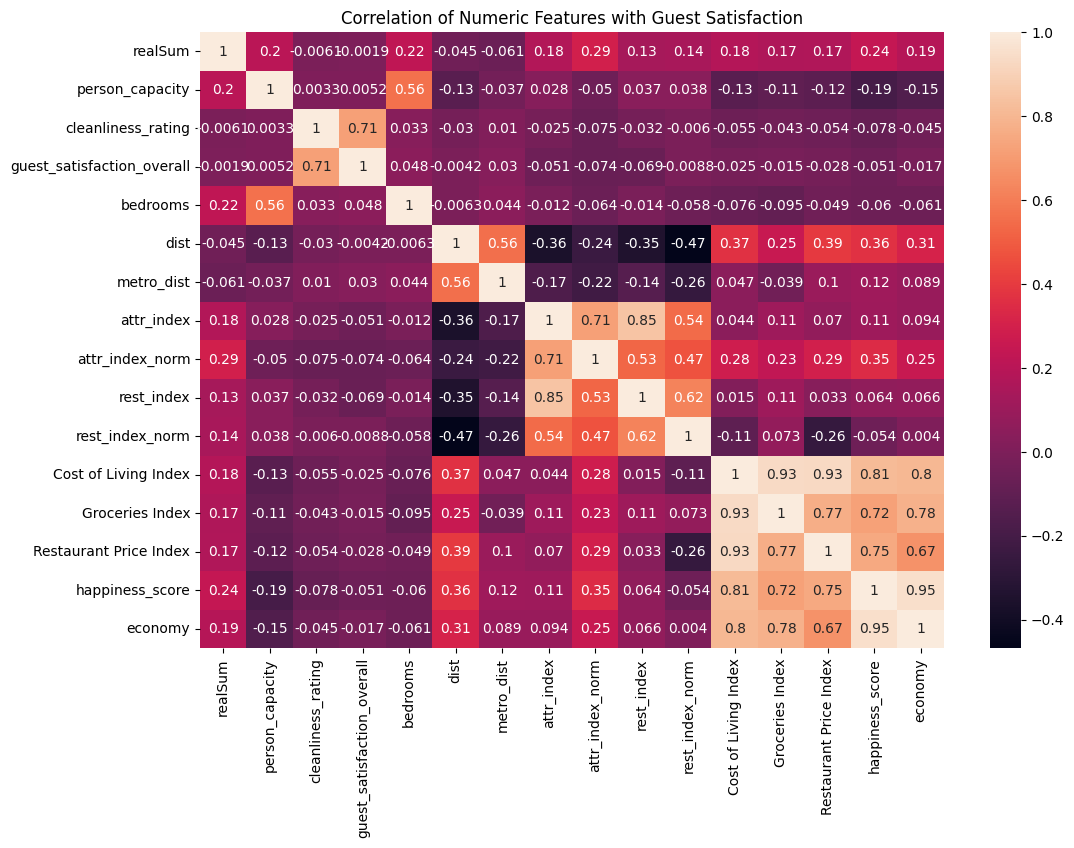

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features w/o boolean flags for more readable heat map
num_features = [
    'realSum','person_capacity','cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
    'dist','metro_dist','attr_index','attr_index_norm',
    'rest_index','rest_index_norm','Cost of Living Index','Groceries Index' ,
    'Restaurant Price Index','happiness_score', 'economy',
]

# Correlation matrix
plt.figure(figsize=(12,8))
numeric = final_df2[num_features]
sns.heatmap(numeric.corr(numeric_only=True), annot=True)
plt.title("Correlation of Numeric Features with Guest Satisfaction")
plt.show()



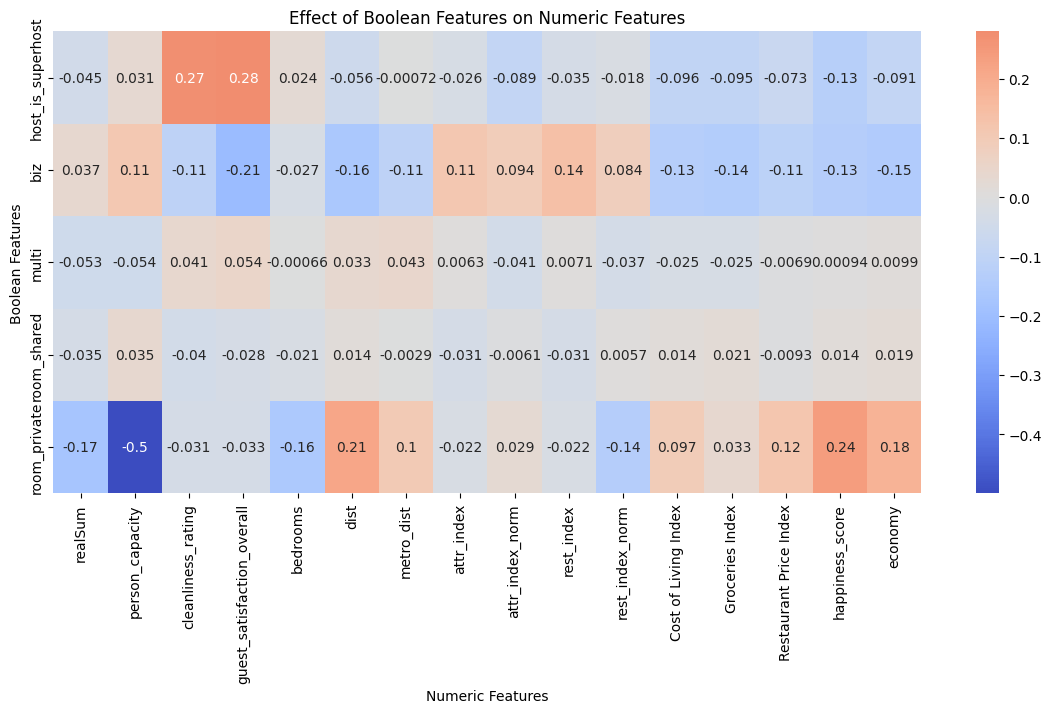

In [ ]:
# bool_features = [
#     'host_is_superhost',
#     'biz',
#     'multi',
#     'room_shared',
#     'room_private',
# ]

# bool_df = final_df2[bool_features].astype(int)
# num_df = final_df2[num_features]

# corr_bool_num = pd.concat([bool_df, num_df], axis=1).corr().loc[bool_features, num_features]

# plt.figure(figsize=(14, 6))
# sns.heatmap(
#     corr_bool_num,
#     annot=True,
#     cmap="coolwarm",
#     center=0
# )
# plt.title("Effect of Boolean Features on Numeric Features")
# plt.ylabel("Boolean Features")
# plt.xlabel("Numeric Features")
# plt.show()


In [ ]:
final_df2.to_csv(r"C:\Users\Asus\Downloads\final_df2.csv", index=False)
